In [1]:
## This notebook is to develope a script to estimate the mass-to-flux of the 
## hour glass flux tubes 

# Author: Sayantan Auddy
# Created : October 9 2017
#modified : 9May 2018
# modified : 25 August 2018

## Phase : Test 

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
plt.rc('text',usetex=True)
import CFS_functions as cfs
import function as mf
import glob
import os.path

In [2]:
# parameters that are needed.
distinpc = 120.0
pc = 3.0857e+18 # cm 
AU = 1.496e+13  # cm
amu = 1.6605402e-24 # g
mu = 2.33*amu
mperH2= 2.8* amu
Msun=1.9891e+33 # g
G = 6.67259e-8 # cm3 g-1 s-2

In [3]:
## Input parameters ##
# fileName = "./plummer_fit_data/H-MM1plummerfit.dat"
# fileName = "./plummer_fit_data/H-MM2plummerfit.dat"
# fileName = "./plummer_fit_data/OpHCNplummerfit.dat"
# fileName = "./plummer_fit_data/OpH-Cplummerfit.dat"
# fileName = "./plummer_fit_data/OpH-Eplummerfit.dat"
# fileName = "./plummer_fit_data/OpH-Xplummerfit.dat"
fileName = "./plummer_fit_data/OpHFEplummerfit.dat"

n_flat,n_flat_error,r_flatinpc,r_flatinpc_error,index,index_error= cfs.readplummerfitdata(fileName)
corename = fileName[19]+fileName[20]+fileName[21]+fileName[22]+fileName[23]
print(corename)
filenametrasonicradius = "./transonic_data/" + corename +'rt.txt'
filenametrasonicsigma  = "./transonic_data/" + corename +'sigmat.txt'
r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
r_c = np.asarray(r_cc_file)
rc_regular = r_c*distinpc*4.84814e-6 # in pc 

rc = rc_regular/r_flatinpc ###### in the units of r_flat
sigma_NT_C_file = mf.readfilefortransonicdata(filenametrasonicsigma)
print(sigma_NT_C_file)
sigma_NT_C = np.asarray(sigma_NT_C_file)*(10**5)
print("sigma_NC=",sigma_NT_C,"cm/s \n","rc_regular =",rc_regular,"pc")

print(n_flat,n_flat_error,r_flatinpc,r_flatinpc_error,index,index_error)
# print(rc,"no units")
beta = 0.5
beta_ul = 0.8
nc = n_flat/(1+(rc_regular/r_flatinpc)**2)**index
print("nc=",nc)
B_cc = (sigma_NT_C  *(4* np.pi*mu* nc)**(.5))/beta
B_cc_ul = (sigma_NT_C  *(4* np.pi*mu* nc)**(.5))/beta_ul
print(B_cc)
print(n_flat/nc)
print(index)

OpHFE
[0.24066022872246828]
sigma_NC= [ 24066.02287225] cm/s 
 rc_regular = [ 0.03577663] pc
[ 233600.] [ 93900.] [ 0.01114] [ 0.004464] [ 0.9113] [ 0.1644]
nc= [ 25604.20340557]
[  5.37028760e-05]
[ 9.12350196]
[ 0.9113]


In [4]:
def numericalfluxcontours(xarray,zarray,index,k,A,i,j):
# def numericalfluxcontours(xarray,index,k,i,):
    '''
    This numerically evaluates the flux as function of radius
    
    '''
    def f(x):
        constant = 2/3
        z = zarray[j]
#         z =0
        r0 = 1 ## because the length scales are in the units of r_0
        n = A/((1+(x/r0)**2+(z/r0)**2)**index)
#         n = (((A)+(x/r0)**2+(z/r0)**2)/(1+(x/r0)**2+(z/r0)**2))**index
#         n = 1+ A/((1+(x/r0)**2+(z/r0)**2)**index)
        flux = constant* x* (n**(k))
        return(flux)
    
    xlimit = xarray
#     print(i)
    def bounds_r():
        return [0, xlimit[i]]
    
    result = integrate.nquad(f, [bounds_r])  
#     return ("the flux is %e" %result[0],'gauss cm^{2}') # units gauss cm**2 Flux
    return(result[0]) # units gauss cm**2 Flux

In [5]:
N=300
xarray = np.linspace(-10,10,N)
zarray = np.linspace(-15,15,N)
print(rc)

[ 3.2115468]


In [6]:
save_path4 = './hourglass_m2f_data/'

# m2fhourglass_file = os.path.join(save_path4, corename + 'm2f_k1' +".dat")
m2fhourglass_file = os.path.join(save_path4, corename + 'm2f_k2' +".dat")


In [7]:
## for  k2  = 2/3
# k2 =1/2
k2 =2/3

A = n_flat/nc
# A  = n_flat/300
print(A)

flux_matrix_k2 = []
for j in range(0,N):
    flux_list = []       # this is for numerical k2= 2/3
    for i in range(0,N):
        flux = numericalfluxcontours(xarray,zarray,index,k2,A,i,j)
        flux_list.append(float(flux)) # in  grams
    flux_matrix_k2.append(flux_list)
        #     flux_list.append(float(f))
        #         flux_model.append(float(fm))
    flux_k2 = np.asarray(flux_matrix_k2)
print(flux_k2.shape)
print(np.max(flux_k2))
print(np.max(flux_k2[5:,]))

[ 9.12350196]
(300, 300)
18.9770639477
18.9770639477


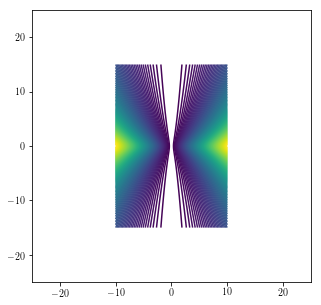

In [8]:
X, Z = np.meshgrid(xarray, zarray)
plt.figure(figsize=(5,5)) # default is (8,6)
# levels = [0.0, 1, 3, 5, 10]
# levels = [0.0,5,8,10]
n=100

levels = np.linspace(0,np.max(flux_k2),n)
# levels =(0,5,10,15,20,30,40)
cp1 = plt.contour(X, Z, flux_k2, levels)

# cp1 = plt.contour(X, Z, flux_k2, label=r'$\kappa=1/2$')
# cp1 = plt.contour(X, Z, flux_k2,levels,colors='k',linestyles='dotted')
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.show()


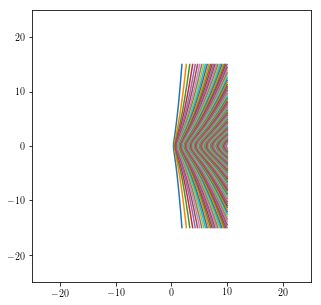

In [9]:
plt.figure(figsize=(5,5))
for i in range(0,n-2): 
# for i in range(0,1)
#     print(i)
    dat0= cp1.allsegs[i+1][1]
    plt.plot(dat0[:,0],dat0[:,1])
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.show()

In [10]:
def massoffluxtubes(xcont,z,N,rc,nc,r_flatinpc,n_flat,index):
    xcontnew_list = []
    dm = []
    # xcontnew_list_act = []
    for i in range(1,N):
#         increasing in z
        deltaz = np.abs(z[i]- z[i-1])
        def f(x):
            amu = 1.6605402e-24 # g
            mu = 2.33*amu
            r0 = 1 ######## the length scale normalised to r_0 but is mass is in regular units
            n_0= n_flat # cm ^-3
            r_0 = r_flatinpc* 3.0857e+18
            constant = 2 * np.pi * mu* r_0**2
            
            density = n_0/((1+(x/r0)**2+(z[i]/r0)**2)**index)
#             density = ((n_0+nc*((x/r0)**2+(z[i]/r0)**2))/(1+(x/r0)**2+(z[i]/r0)**2))**index
            
            return (constant*x*density) 

        
        r_0 = r_flatinpc* 3.0857e+18
    ##  when the tubes go beyond the sphere of radius rc    
        if np.sqrt(z[i]**2+ xcont[i]**2) >= rc :
    #         print("beyond the circle",xcont[i])
    #         (print("the radius",np.sqrt(z[i]**2+ xcont[i]**2)))
            xcontnew = np.sqrt(rc**2-z[i]**2)
            xcontnew_list.append(float(xcontnew))
    #         print("the new radius",np.sqrt(z[i]**2+ xcontnew**2))
    #         print("test",xcontnew_list)
#             print(xcontnew,z[i])

            def bounds_x():
                return [0, xcontnew]
            result = integrate.nquad(f, [bounds_x])
            dm.append(float(result[0]*deltaz*r_0)) 
    #         print("mass" ,dm)

    ## when the tube is inside the sphere        
        else:
    #         print("in the circle",xcont[i])
            xcontnew_list.append(float(xcont[i]))

            def bounds_x():
                return [0, xcont[i]]
            result = integrate.nquad(f, [bounds_x])
            dm.append(float(result[0]*deltaz*r_0))  
#         print("mass is = ",dm)
    return(dm,xcontnew_list)


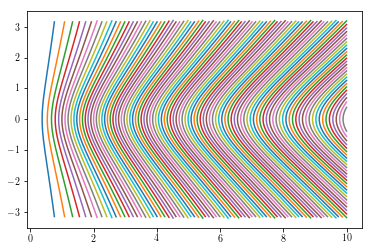

12 12 2.35550235801e+32


In [11]:
totalmassfluxtube = []
for i in range(0,n-2):
#     print(i)
    dat0= cp1.allsegs[i+1][1]
    zcontour = np.asarray(dat0[:,1])
    z =zcontour[np.abs(zcontour)<=rc]
    # output = y[np.all([x > 1, x < 5], axis=0)] 
    x = np.asarray(dat0[:,0])
    xcont = x[np.all([np.abs(zcontour)<=rc], axis=0)]
    
    N = len(z)
    mass = massoffluxtubes(xcont,z,N,rc,nc,r_flatinpc,n_flat,index)
    totalmassfluxtube= np.sum(mass)
    plt.plot(xcont,z)
plt.show()
print(len(xcont),len(z),totalmassfluxtube)

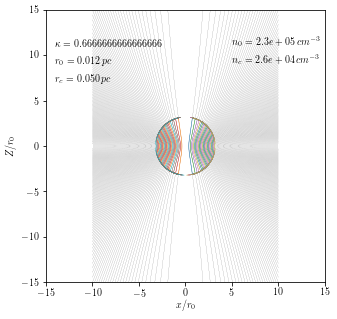

In [12]:
plt.figure(figsize=(5,5))
totalmassfluxtube= []
radiusinro = []
for j in range(0,n-2):
#     print(i)
    dat0= cp1.allsegs[j+1][1]
#     r_0 = 0.014* 3.0857e+18
    zcontour = np.asarray(dat0[:,1])
    
    z =zcontour[np.abs(zcontour)<=rc]
    x = np.asarray(dat0[:,0])
    xcont = x[np.all([np.abs(zcontour)<=rc], axis=0)]
    
    plt.plot(x,zcontour,'k',linewidth = 0.1)
    plt.plot(np.negative(x),zcontour,'k',linewidth = 0.1)
#     print(np.min(xcont))
    
    if np.min(xcont)<=rc:
        xcont= xcont
        radiusinro.append(np.min(xcont))
        
#         print(len(xcont))
#         print(len(z))
#         print(N)
        N = len(z)
        mass,xcontnew_list = massoffluxtubes(xcont,z,N,rc,nc,r_flatinpc,n_flat,index)
#         print(mass)
        totalmassfluxtube.append(np.sum(mass))
#        
#         
        
        
#         plt.figure(2)
#         plt.figure(figsize=(5,5))
#         xcontnew_list_pl = np.asarray(xcontnew_list)*0.014
        plt.plot(xcontnew_list,z[1:,],linewidth = 0.5)
        plt.plot(np.negative(xcontnew_list),z[1:],linewidth = 0.5)
        
#         plt.figure(2)
#         plt.plot(totalmassfluxtube,z)
# plt.text(10,25, r'$n_{0}/n_{u}=%s $' % A, Fontsize =10)
plt.text(-14,11, r'$\kappa = %s $'%k2)
plt.text(-14,9, r'$r_0 = 0.012 \,pc  $')
plt.text(5,11, r'$n_0 = %5.1e \,cm^{-3}   $' %n_flat)
plt.text(5,9, r'$n_c = %5.1e \,cm^{-3}   $'%nc)
plt.text(-14,7, r'$r_c = 0.050 \,pc   $')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel(r'$x/r_0$ ')
plt.ylabel(r'$Z/r_0$ ')
plt.savefig("H_MM1_hourglass.pdf",format='pdf',dpi=300)
plt.show()
# print(len(xcont),len(z),len(totalmassfluxtube))

In [13]:
print(totalmassfluxtube)

print(len(radiusinro),len(totalmassfluxtube))

[6.714949105265363e+31, 1.3183708883864113e+32, 1.9361019999219793e+32, 2.5258410940234123e+32, 3.0878680814423548e+32, 3.6234642894919279e+32, 4.1352692744211233e+32, 4.6182914954366164e+32, 5.0823245828776496e+32, 5.5233289874591651e+32, 5.940993450581415e+32, 6.3384801502594932e+32, 6.7139259843800044e+32, 7.0691628550090766e+32, 7.4052085101815938e+32, 7.722941809502904e+32, 8.0228595214675116e+32, 8.3037358428953263e+32, 8.5661496103323063e+32, 8.8095170329140376e+32, 9.0368368978823894e+32, 9.2469220867289747e+32, 9.4389664390194671e+32, 9.6169681721566991e+32, 9.7758188350852048e+32, 9.9157387339119069e+32, 1.0039849061040489e+33, 1.0146109577914823e+33, 1.0232215915287009e+33, 1.0291569965191297e+33]
30 30


In [14]:
B_u = B_cc
B_u_ul = B_cc_ul
# B_u = 15 * 10**-6
r_0 = r_flatinpc* 3.0857e+18
flux = levels[1:len(radiusinro)+1] *(3*np.pi*B_u*r_0**2)
flux_ul = levels[1:len(radiusinro)+1] *(3*np.pi*B_u_ul*r_0**2)
print(len(flux),len(totalmassfluxtube))
print(len(flux_ul),len(totalmassfluxtube))
print(r_0,B_u)

30 30
30 30
[  3.43746980e+16] [  5.37028760e-05]


In [15]:
G = 6.67259e-8 # cm3 g-1 s-2
# 1 Gauss = g^(1/2) * cm^{-1/2}* s^-1
m2f0 = 1/(2* np.pi *np.sqrt(G))
masstoflux = (totalmassfluxtube/flux[0:,])/m2f0
masstoflux_ul = (totalmassfluxtube/flux_ul[0:,])/m2f0
# m2f0 = 1/(2* np.pi *np.sqrt(G))



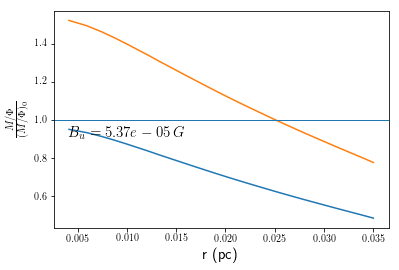

In [16]:
# plt.figure(figsize=(5,5))
rforplot = np.asarray(radiusinro)*r_flatinpc
plt.plot(rforplot,masstoflux)
plt.plot(rforplot,masstoflux_ul)
plt.axhline(y=1, xmin=0, xmax=1,linewidth= 1)
plt.ylabel(r'$\frac{M/\Phi}{(M/\Phi)_0}$', fontsize=15)
plt.xlabel(r'r (pc)',fontsize=15)
plt.text(0.004,0.9, r'$B_u= %.2e \, G $'%B_u ,fontsize=15 )
plt.savefig("H_MM1_hourglass_m2f.pdf",format='pdf',dpi=300)

# plt.text(0.004,0.9, r'$(\sigma_{B}/B)_c=%.2f $ '%  beta,fontsize=15 )
plt.show()

In [17]:
Datahourglass_m2f = np.column_stack((rforplot,masstoflux,masstoflux_ul))
np.savetxt(m2fhourglass_file,Datahourglass_m2f, fmt=('%5.3e','%5.3e','%5.3e'))

In [18]:
# print(type.r_flatinpc)